In [1]:
#https://www.kaggle.com/code/lcdelprete/video-game-sales-analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np


Creating Dataframes

In [2]:
df = pd.read_csv('vgsales.csv')


**Columns' information**

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales (in millions)

Identifying the total number of rows and columns in the dataset as well as the data type and memory usage will be done next.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Year is the float64, and should be converted to the date.
There are null values in Year and Publisher columns. 

Descriptive analysis 

Count of null values 

In [4]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


There are 271 null values in Year, and 58 in Publisher column.

Total number of unique values for each column

In [5]:
unique_number = []  # calculate the # unique values in each column
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x) # append(x) will add the unique number to the 
pd.DataFrame(unique_number,index = df.columns,columns=["Total Unique Value"])

,Total Unique Value
Rank,16598
Name,11493
Platform,31
Year,39
Genre,12
Publisher,578
NA_Sales,409
EU_Sales,305
JP_Sales,244
Other_Sales,157


So, the number of the games is 16598, 12 genere, 31 platform for 39 years. 

Find duplicates 

In [6]:
df[df.duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Convert Year to date


In [7]:
df['Year'] =  pd.to_datetime(df['Year'])

In [8]:
df.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

Numerical vs Categoriacl Separation

In [9]:
numCols = df.select_dtypes("number").columns
catCols = df.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
print('Numerical Columns: ', numCols)
print('Categorical Columns: ', catCols)

Numerical Columns:  ['EU_Sales', 'NA_Sales', 'Other_Sales', 'Global_Sales', 'Rank', 'JP_Sales']
Categorical Columns:  ['Genre', 'Publisher', 'Platform', 'Name']


Find the description of the data in the DataFrame

In [10]:
df[numCols].describe().transpose().round(4)

,count,mean,std,min,25%,50%,75%,max
EU_Sales,16598.0,0.1467,0.5054,0.00,0.00,0.02,0.11,29.02
NA_Sales,16598.0,0.2647,0.8167,0.00,0.00,0.08,0.24,41.49
Other_Sales,16598.0,0.0481,0.1886,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.5374,1.5550,0.01,0.06,0.17,0.47,82.74
Rank,16598.0,8300.6053,4791.8539,1.00,4151.25,8300.50,12449.75,16600.00
JP_Sales,16598.0,0.0778,0.3093,0.00,0.00,0.00,0.04,10.22


Find the correlation between the numerical values


[Text(0.5, 0, 'Rank'),
 Text(1.5, 0, 'NA_Sales'),
 Text(2.5, 0, 'EU_Sales'),
 Text(3.5, 0, 'JP_Sales'),
 Text(4.5, 0, 'Other_Sales'),
 Text(5.5, 0, 'Global_Sales')]

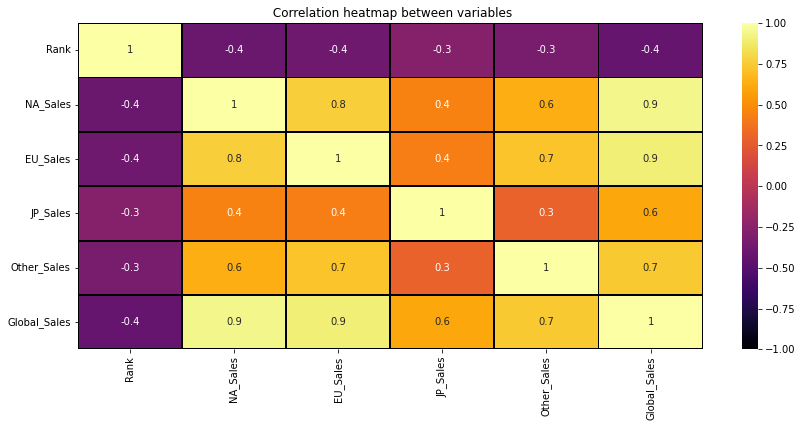

In [11]:
corr_df=df.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot= True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title(" Correlation heatmap between variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)